In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("./benchmarkResults/25-07_benchmark_results.csv")
dfg = pd.read_csv("./benchmarkResults/greedy_benchmark_results.csv")

#display(df.to_string())

In [267]:
def size(row):
    return int(str(row["file"]).split("/")[2][-1])

def density(row):
    return int(str(row["file"]).split("/")[3][-2:])

def ex(row):
    return int(str(row["file"]).split("/")[4][2])

df['size'] = df.apply(lambda row: size(row), axis=1)
df['density'] = df.apply(lambda row: density(row), axis=1)
df['ex'] = df.apply(lambda row: ex(row), axis=1)
            
dfg['size'] = dfg.apply(lambda row: size(row), axis=1)
dfg['density'] = dfg.apply(lambda row: density(row), axis=1)
dfg['ex'] = dfg.apply(lambda row: ex(row), axis=1)

df

,file,time,#nodes,pathlength,horizon,#moves,size,density,ex
0,./benchmark_examples/size5x5/density20/ex1.lp,0.024286,2.0,0.0,5.0,19.0,5,20,1
1,./benchmark_examples/size5x5/density20/ex10.lp,0.753991,10.0,3.0,7.0,28.0,5,20,1
2,./benchmark_examples/size5x5/density20/ex11.lp,0.215480,5.0,2.0,6.0,20.0,5,20,1
3,./benchmark_examples/size5x5/density20/ex12.lp,0.757107,14.0,4.0,6.0,20.0,5,20,1
4,./benchmark_examples/size5x5/density20/ex13.lp,0.119025,3.0,1.0,5.0,15.0,5,20,1
...,...,...,...,...,...,...,...,...,...
161,./benchmark_examples/size8x8/density30/ex6.lp,NaN,NaN,NaN,NaN,NaN,8,30,6
162,./benchmark_examples/size8x8/density30/ex7.lp,NaN,NaN,NaN,NaN,NaN,8,30,7
163,./benchmark_examples/size8x8/density30/ex8.lp,NaN,NaN,NaN,NaN,NaN,8,30,8
164,./benchmark_examples/size8x8/density30/ex9.lp,NaN,NaN,NaN,NaN,NaN,8,30,9


In [314]:
# sort data by size + density

def sort_by_category(to_sort):
    '''returns list of DataFrames'''
    lcg = [] #(List of Categorised Groups)
    for i in range(int((len(to_sort)-1)/15)):
        lcg.append(to_sort.iloc[(i*15):(i*15+15)])
    return lcg

# list of DataFrames, split by size + density
catList = sort_by_category(df)
greedyCatList = sort_by_category(dfg)



# for every df in received list, 
# calculate how many NaN rows are in there
# returns: list of int

def nan_counter(cat_df):
    lc = [] # List of Counts
    for elem in cat_df:
        counter = 0
        for i in range(15):
            if np.isnan(elem["time"].iloc[i]):
                counter += 1
        lc.append(counter)
    return lc

# list of NaN rows in cat_list df
nanList = nan_counter(catList)
greedyNanList = nan_counter(greedyCatList)



# calculate list of mean times 
def mean_list(df_list):
    l = []
    for elem in df_list:
        l.append(elem.mean()[0])
    return l

# list of mean times for each size + density combination
mean = mean_list(cat_list)
mean

[0.36792573606556594,
 2.5683630408680376,
 53.87192752490889,
 8.118940189333323,
 40.09910480566808,
 74.35030599328873,
 3.891080764215855,
 10.055426807000913,
 nan,
 44.926600583920774,
 173.4262973169971]

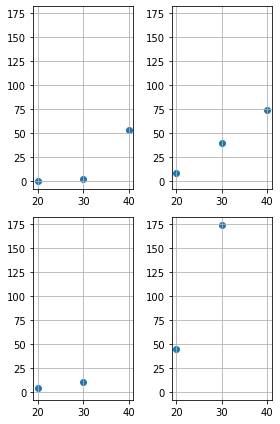

In [313]:
# df1 = df.loc[(df['ex']==1)].copy(deep=True)
# df2 = df.loc[(df['ex']==2)]
# df3 = df.loc[(df['ex']==3)]

# df1['time'] = df['time'].fillna(5*60)


# plot mean times for each density/size combination
points = np.linspace(0, len(mean), len(mean))
points = [20,30,40]
  


fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharey=ax1, sharex=ax1)
ax3 = fig.add_subplot(2, 2, 3, sharey=ax1, sharex=ax1)
ax4 = fig.add_subplot(2, 2, 4, sharey=ax1, sharex=ax1)

ax1.scatter(points, mean[:3])
ax2.scatter(points, mean[3:6])
ax3.scatter(points, mean[6:9])
ax4.scatter(points[:-1], mean[9:])

fig.set_size_inches(4, 6, forward=True)
fig.tight_layout()


ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.show()

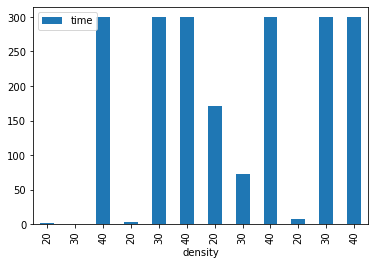

In [146]:
df1.plot(kind="bar",x="density",y="time")
plt.show()

In [ ]:
ideas:
    dreidimensionale Grafik (size - density - time)
    Durchschnitt aus allen drei ex ziehen (exclude NaN?)
    neu messen mit kleineren Abständen bei Dichte
    Optimalität bei greedy vs normal vergleichen
    
was mache ich heute?
    Übung
    Arbeit schreiben
    Funktion fertig machen
    Kommentare in Code schreiben
    Github Erklärungen/Aufbau verbessern